# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:* $\frac{\partial C}{\partial t}$ starts high for very short‐dated options and then falls off as time to expiration increases. In other words, adding an extra month of life has a larger impact on the price of a near‐term call than on a multi‐year call—time value decays at a decreasing rate.
  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

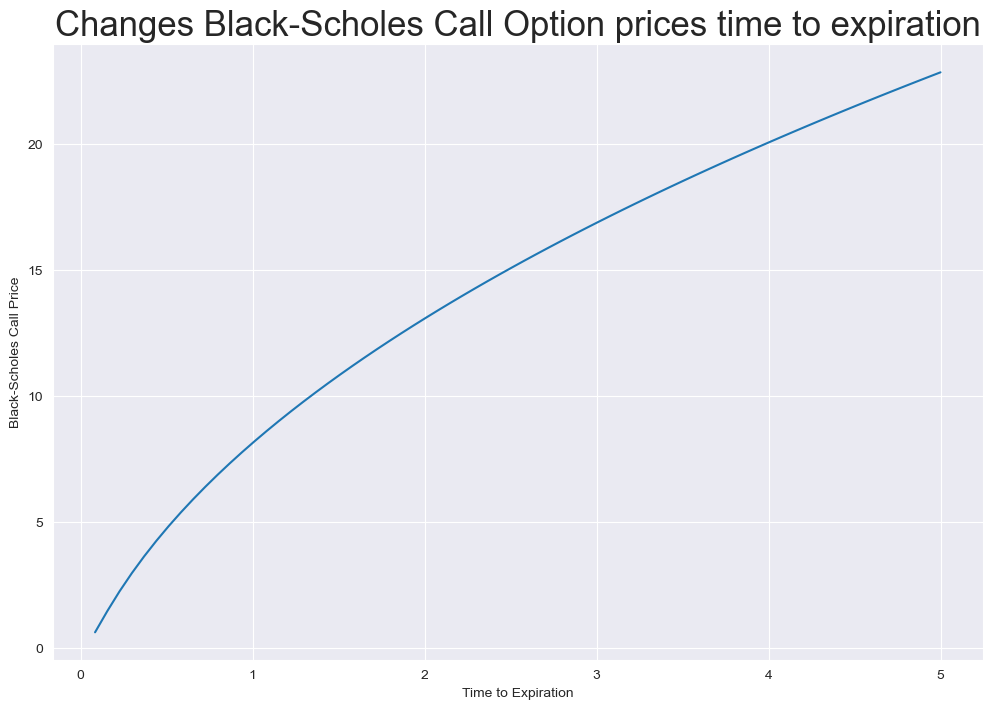

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
r=0
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

#  Rate of change wrt time for call


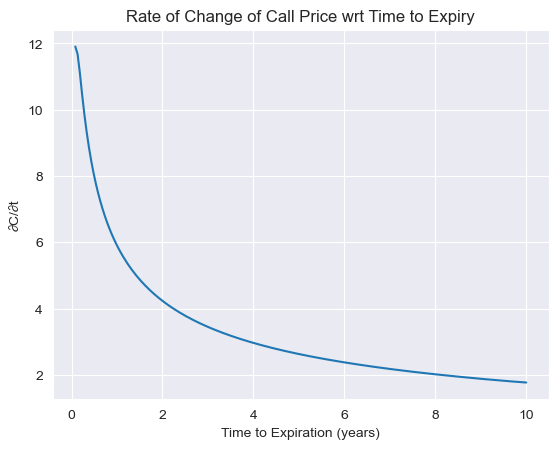

In [19]:
# Part (a): Rate of change wrt time for call
times = np.linspace(1/12, 10, 200)
call_prices = [bs_call(100, K, sigma, t, r) for t in times]
call_theta = np.gradient(call_prices, times)

plt.figure()
plt.plot(times, call_theta)
plt.title('Rate of Change of Call Price wrt Time to Expiry')
plt.xlabel('Time to Expiration (years)')
plt.ylabel('∂C/∂t')
plt.show()

The plot shows:

- Very steep initial slope when $t$ is just above zero. A tiny addition of time to expiration on a nearly-expired option boosts its price the most.

-Rapid decay in that slope as $t$ grows: once you’ve moved past the first few months, each extra year of life adds progressively less to the call’s value.

- Long-maturity plateau: beyond 2–3 years, $\frac{\partial C}{\partial t}$ flattens out to a small, nearly constant positive value.

Intuition:

- When there’s almost no time left, the option’s only value is its remaining extrinsic/time value—so “buying” a bit more time is enormously valuable.

- As maturity extends, volatility already has plenty of time to play out, so additional time adds diminishing marginal benefit.

# Rate of change wrt spot price for call (Delta)

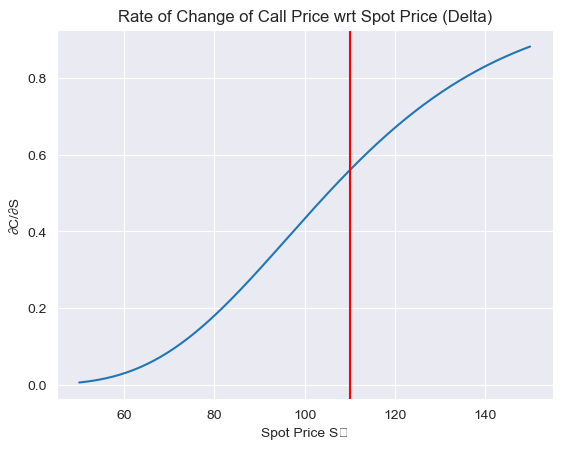

In [44]:
# Part (b): Rate of change wrt spot price for call (Delta)
S0s = np.linspace(50, 150, 200)
t=1
call_delta = [norm.cdf((np.log(S0/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))) for S0 in S0s] #At time t=1

plt.figure()
plt.plot(S0s, call_delta)
plt.axvline(K, color='red')
plt.title('Rate of Change of Call Price wrt Spot Price (Delta)')
plt.xlabel('Spot Price S₀')
plt.ylabel('∂C/∂S')
plt.show()

Call Option – Spot Price Sensitivity ($\frac{\Delta C}{\Delta S}$)

Looking at the delta curve we generated for a one-year call ($t=1$):

- Deep out-of-the-money ($S0≪𝐾$) $\frac{\Delta C}{\Delta S}$ is almost zero. When the spot is far below the strike, the call is unlikely to finish in the money, so its price barely moves with small changes in $S0$

- Around the strike ($S0\approx K$), Delta climbs most steeply here, passing through about 0.5 at $S0=K=110$. This “middle” region is where the option is most responsive to spot—each $1 move in the underlying translates to roughly a $0.5 move in the call’s value.

- Deep in-the-money (
𝑆
0
≫
𝐾
S 
0
​
 ≫K)
ΔC/ΔS approaches 1. Once the call is almost certain to be exercised, it behaves like holding the underlying itself—each additional dollar in 
𝑆
0

  adds nearly a dollar to the call price.

In sum, the “S-shaped” delta curve reflects the transition from virtually no sensitivity when deeply out-of-the-money, through a steep region around the strike, to full sensitivity in the deep in-the-money regime.

# Rate of change wrt time for put

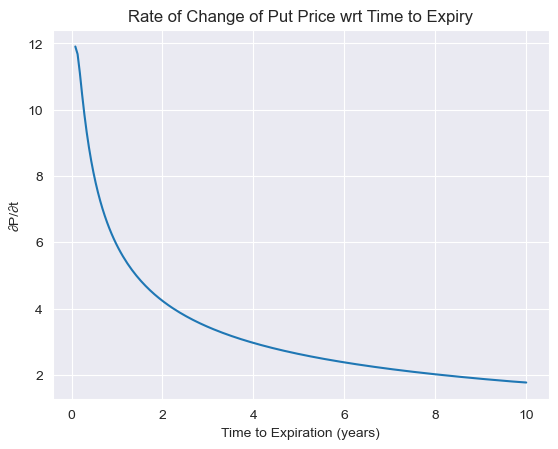

In [48]:
# Part (c): Rate of change wrt time for put
put_prices = [bs_put(100, K, sigma, t, r) for t in times]
put_theta = np.gradient(put_prices, times)

plt.figure()
plt.plot(times, put_theta)
plt.title('Rate of Change of Put Price wrt Time to Expiry')
plt.xlabel('Time to Expiration (years)')
plt.ylabel('∂P/∂t')
plt.show()

# Rate of change wrt spot price for put (Delta)


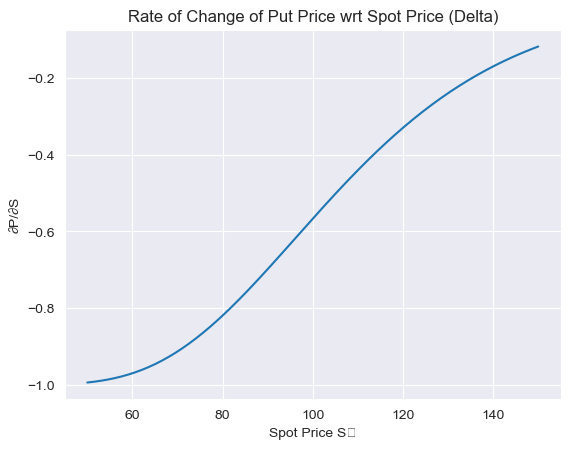

In [50]:
 #Rate of change wrt spot price for put (Delta)
put_delta = [norm.cdf((np.log(S0/K) + (r + 0.5 * sigma**2) * 1) / (sigma * np.sqrt(1))) - 1 for S0 in S0s]

plt.figure()
plt.plot(S0s, put_delta)
plt.title('Rate of Change of Put Price wrt Spot Price (Delta)')
plt.xlabel('Spot Price S₀')
plt.ylabel('∂P/∂S')
plt.show()